In [160]:
# Handling imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.cluster import k_means, DBSCAN
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [3]:
#%%
train = pd.read_csv("data/training.csv")
test = pd.read_csv("data/test.csv")
sample_sub = pd.read_csv("data/sample_submission.csv")

# EDA

In [ ]:
train.head()

In [ ]:
train.dtypes

In [ ]:
train.columns

In [62]:
# select features
columns = test.columns
features = train

# combine test and train
comb = pd.concat([features,test])

In [5]:
comb.head()

,ID,Latitude,Longitude,Q1,Q10,Q11,Q12,Q13,Q14,Q15,...,Q8_6,Q8_7,Q8_8,Q8_9,Q9,borrowing,insurance,mobile_money,mobile_money_classification,savings
0,5086,-4.460442,29.811396,98,-1,-1,2,-1,2,-1,...,0,0,0,1,-1,0.0,0.0,0.0,0.0,0.0
1,1258,-6.176438,39.244871,40,-1,-1,1,4,1,5,...,0,0,0,0,1,1.0,0.0,1.0,3.0,1.0
2,331,-6.825702,37.652798,18,-1,-1,2,-1,2,-1,...,0,0,0,1,-1,0.0,0.0,1.0,2.0,0.0
3,6729,-3.372049,35.808307,50,-1,-1,1,2,2,-1,...,0,0,0,0,-1,1.0,0.0,1.0,3.0,0.0
4,8671,-7.179645,31.039095,34,1,-1,2,-1,1,1,...,0,0,0,0,-1,0.0,1.0,1.0,3.0,1.0


In [63]:
# converting int64 and float64 to int32 and float32
int_col = ['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19']
float_col = ['Latitude', 'Longitude']


for col_1 in int_col:
    comb[col_1] = comb[col_1].astype('int32')
for col_2 in float_col:
    comb[col_2] = comb[col_2].astype('float32')


In [ ]:
train.hist('Q1')

In [ ]:
test.hist('Q1')

In [ ]:
features.head(2)

In [ ]:
features.describe()

In [ ]:
features.head()

In [ ]:
# plot cordinates
plt.scatter(train.Latitude, train.Longitude)
plt.title("Cordinates for train")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,15))
plt.scatter(test.Latitude, test.Longitude)
plt.title("Cordinates for test")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

# Feature engineering

In [64]:
## create clusters based on location
points = np.array([[features.Latitude[i], features.Longitude[i]]for i in range(len(features))]) 
cluster = k_means(points,n_clusters=19,random_state=1990)
cluster_labels = cluster[1]
features["cord_clusters"] = cluster_labels

In [65]:
features.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification,cord_clusters
0,5086,98,2,3,1,1,2,2,0,0,...,4,4,-4.460442,29.811396,0,0,0,0,0,11
1,1258,40,1,1,3,5,1,1,1,0,...,1,4,-6.176438,39.244871,1,1,1,0,3,0
2,331,18,2,4,6,3,2,1,0,0,...,1,1,-6.825702,37.652798,1,0,0,0,2,16
3,6729,50,1,1,3,1,1,1,0,0,...,1,4,-3.372049,35.808307,1,0,1,0,3,5
4,8671,34,1,1,1,1,2,1,0,1,...,1,4,-7.179645,31.039095,1,1,0,1,3,6


In [30]:
test.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Latitude,Longitude,cord_clusters
0,2352,30,2,1,3,6,2,1,0,0,...,6,1,4,5,-1,1,4,-2.596421,32.913584,16
1,8208,53,1,1,3,1,2,1,0,1,...,-1,1,4,1,-1,1,4,-1.778303,34.062640,10
2,2785,23,2,1,3,5,1,1,0,0,...,4,1,4,1,-1,1,1,-1.851789,31.536866,1
3,2967,30,2,3,3,4,1,2,0,1,...,-1,2,-1,1,-1,1,4,-1.235656,34.229012,10
4,1697,28,2,1,5,4,2,1,0,0,...,4,1,6,4,3,1,2,-7.780934,35.691878,5


In [28]:
## create clusters based on location
points = np.array([[test.Latitude[i], test.Longitude[i]]for i in range(len(test))]) 
cluster = k_means(points,n_clusters=19,random_state=1990)
cluster_labels = cluster[1]
test["cord_clusters"] = cluster_labels

In [34]:
comb = pd.concat([features,test])

In [ ]:
import descartes
import geopandas as gpd
from shapely.geometry  import Point, Polygon

In [ ]:
place_map = gpd.read_file("places/places.dbf")

In [ ]:
place_map.head()

In [ ]:
fig,ax = plt.subplots(figsize=(15,15))
place_map.plot(ax=ax)

In [ ]:
mobile_money_agents = pd.read_csv("FSDT_FinAccessMapping/mobilemoney_agents_for_upload_win.csv",encoding="latin")

In [ ]:
mobile_money_agents.region.unique()

In [ ]:
geometry = [Point(xy) for xy in zip(features.Longitude,features.Latitude)]
geometry[:2]

In [ ]:
geo_df = gpd.GeoDataFrame(features,geometry=geometry)
geo_df.head()

In [ ]:
mobile_money_agents.region.unique()

In [ ]:
fig,ax = plt.subplots(figsize=(15,15))
place_map.plot(ax=ax,alpha=0.4, color = "grey")
geo_df[geo_df['region']=='Ruvuma'].plot(ax=ax, markersize=20,color='red',label='Ruvuma')
geo_df[geo_df['region']=='Kilimanjaro'].plot(ax=ax, markersize=20,color='blue',label='Kilimanjaro')
geo_df[geo_df['region']=='Dar es Salaam'].plot(ax=ax, markersize=20,color='green',label='Dar es Salaam')
geo_df[geo_df['region']=='Mbeya'].plot(ax=ax, markersize=20,color='yellow',label='Mbeya')
geo_df[geo_df['region']=='Arusha'].plot(ax=ax, markersize=20,color='black',label='Arusha')
geo_df[geo_df['region']=='Pwani'].plot(ax=ax, markersize=20,color='indigo',label='Pwani')
geo_df[geo_df['region']=='Morogoro'].plot(ax=ax, markersize=20,color='magenta',label='Morogoro')
geo_df[geo_df['region']=='Mwanza'].plot(ax=ax, markersize=20,color='violet',label='Mwanza')
geo_df[geo_df['region']=='Mara'].plot(ax=ax, markersize=20,color='orange',label='Kagera')
geo_df[geo_df['region']=='Manyara'].plot(ax=ax, markersize=20,color='purple',label='Manyara')
geo_df[geo_df['region']=='Iringa'].plot(ax=ax, markersize=20,color='pink',label='Iringa')
geo_df[geo_df['region']=='Tanga'].plot(ax=ax, markersize=20,color='cyan',label='Tanga')
geo_df[geo_df['region']=='Shinyanga'].plot(ax=ax, markersize=20,color='C1',label='Shinyanga')
geo_df[geo_df['region']=='Singida'].plot(ax=ax, markersize=20,color='C2',label='Singida')
geo_df[geo_df['region']=='Tabora'].plot(ax=ax, markersize=20,color='C8',label='Tabora')
geo_df[geo_df['region']=='Lindi'].plot(ax=ax, markersize=20,color='C3',label='Lindi')
geo_df[geo_df['region']=='Kigoma'].plot(ax=ax, markersize=20,color='C4',label='Kigoma')
geo_df[geo_df['region']=='Mtwara'].plot(ax=ax, markersize=20,color='0.2',label='Mtwara')
geo_df[geo_df['region']=='Rukwa'].plot(ax=ax, markersize=20,color='0.3',label='Rukwa')
geo_df[geo_df['region']=='Kagera'].plot(ax=ax, markersize=20,color='C6',label='Kagera')
geo_df[geo_df['region']=='Zanzibar'].plot(ax=ax, markersize=20,color='0.6',label='Zanzibar')
plt.savefig("Mobile_noney_agent_Location.jpg")
plt.legend()

In [ ]:
fig,ax = plt.subplots(figsize=(15,15))
place_map.plot(ax=ax,alpha=0.4, color = "grey")
geo_df[geo_df['cord_clusters']==0].plot(ax=ax, markersize=20,color='red',label='Pwani')
geo_df[geo_df['cord_clusters']==1].plot(ax=ax, markersize=20,color='blue',label='Tabora')
geo_df[geo_df['cord_clusters']==2].plot(ax=ax, markersize=20,color='green',label='Mbeya')
geo_df[geo_df['cord_clusters']==3].plot(ax=ax, markersize=20,color='yellow',label='Dodoma')
geo_df[geo_df['cord_clusters']==4].plot(ax=ax, markersize=20,color='black',label='Mtwara')
geo_df[geo_df['cord_clusters']==5].plot(ax=ax, markersize=20,color='indigo',label='Arusha')
geo_df[geo_df['cord_clusters']==6].plot(ax=ax, markersize=20,color='magenta',label='Rukwa')
geo_df[geo_df['cord_clusters']==7].plot(ax=ax, markersize=20,color='violet',label='Iringa')
geo_df[geo_df['cord_clusters']==8].plot(ax=ax, markersize=20,color='orange',label='Kagera')
geo_df[geo_df['cord_clusters']==9].plot(ax=ax, markersize=20,color='purple',label='Mara')
geo_df[geo_df['cord_clusters']==10].plot(ax=ax, markersize=20,color='green',label='Tanga')
geo_df[geo_df['cord_clusters']==11].plot(ax=ax, markersize=20,color='cyan',label='Kigoma')
geo_df[geo_df['cord_clusters']==12].plot(ax=ax, markersize=20,color='red',label='Iringa')
geo_df[geo_df['cord_clusters']==13].plot(ax=ax, markersize=20,color='C2',label='Ruvuma')
geo_df[geo_df['cord_clusters']==14].plot(ax=ax, markersize=20,color='blue',label='Rukwa')
geo_df[geo_df['cord_clusters']==15].plot(ax=ax, markersize=20,color='red',label='Shinyanga')
geo_df[geo_df['cord_clusters']==16].plot(ax=ax, markersize=20,color='C4',label='Morogoro')
geo_df[geo_df['cord_clusters']==17].plot(ax=ax, markersize=20,color='black',label='Zanzibar')
geo_df[geo_df['cord_clusters']==18].plot(ax=ax, markersize=20,color='C6',label='Sigida')
plt.savefig("tanzania_mobile_money.jpg")
plt.legend()

In [66]:
# dataset based on clusters and income of region
data = [[0,'Pwani',18210,8102,28.1],[1,'Tabora',17766,10180,25.10],[2,'Mbeya',17311,9990,23.6],[3,'Dodoma',18334,11108,47.3],[4,'Mtwara',23252,11517,31.5],[5,'Arusha',20596,8517,16.7]
        ,[6,'Rukwa',8572,3564],[7,'Iringa',19187,7867,36.1],[8,'Kagera',14057,9535,32.9],[9,'Mara',13721,7350,20.8],[10,'Tanga',12210,7160,37.8],[11,'Kigoma',12334,5675,29.6]
        ,[12,'Iringa',14057,7867,36.1],[13,'Ruvuma',16848,7800,25.8],[14,'Rukwa',8572,3564,76.7],[15,'Shinyanga',16944,6873,34.8],[16,'Morogoro',18406,8563,52],
        [17,'Zanzibar',120920,50000,20],[18,'Sigida',9853,4258,24]]
income = pd.DataFrame(data=data,columns=['cord_clusters','region','household_mean_income','household_median_income','distance_to_bank'])

In [67]:
income.cord_clusters.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [38]:
features_copy = features

In [68]:
# Adding income to the dataset
features = features.merge(income,on='cord_clusters')

In [ ]:
test = test.merge(income,on='cord_clusters')

In [69]:
features.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification,cord_clusters,region,household_income
0,5086,98,2,3,1,1,2,2,0,0,...,-4.460442,29.811396,0,0,0,0,0,11,Kigoma,12334
1,5576,27,2,1,3,1,2,2,0,1,...,-4.614918,29.787609,1,1,0,0,3,11,Kigoma,12334
2,2149,27,2,2,1,1,2,2,0,1,...,-3.420720,30.741158,0,0,1,0,1,11,Kigoma,12334
3,7977,19,1,4,3,3,2,1,0,1,...,-4.744900,29.697868,1,1,0,1,3,11,Kigoma,12334
4,7746,17,1,4,5,3,2,2,0,0,...,-4.907854,29.662191,1,0,0,0,2,11,Kigoma,12334


In [ ]:
features = features.sample()

In [ ]:
features_copy[features_copy.ID==5086]

In [ ]:
features[features.ID==5086]

In [ ]:
train[train.Q1==20].head()

# Categorical data encoding

In [70]:
# frequecy encoding
def encoding(cols,features):
    encoding = features.groupby(cols).size()
    encoding = encoding/len(features)
    features[cols] = features[cols].map(encoding)

In [71]:
encoding('Q13',features)
encoding('cord_clusters',features)
encoding('Q15',features)

In [72]:
features.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification,cord_clusters,region,household_income
0,5086,98,2,3,1,1,2,2,0,0,...,-4.460442,29.811396,0,0,0,0,0,0.026219,Kigoma,12334
1,5576,27,2,1,3,1,2,2,0,1,...,-4.614918,29.787609,1,1,0,0,3,0.026219,Kigoma,12334
2,2149,27,2,2,1,1,2,2,0,1,...,-3.420720,30.741158,0,0,1,0,1,0.026219,Kigoma,12334
3,7977,19,1,4,3,3,2,1,0,1,...,-4.744900,29.697868,1,1,0,1,3,0.026219,Kigoma,12334
4,7746,17,1,4,5,3,2,2,0,0,...,-4.907854,29.662191,1,0,0,0,2,0.026219,Kigoma,12334


In [48]:
features.columns

Index(['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Latitude', 'Longitude', 'mobile_money', 'savings', 'borrowing',
       'insurance', 'mobile_money_classification', 'cord_clusters', 'region',
       'household_income'],
      dtype='object')

In [73]:
labels = features['mobile_money_classification']

In [74]:
# drop id
features.drop(['ID','region','mobile_money', 'savings', 'borrowing','mobile_money_classification','insurance'], inplace=True, axis = 1)

In [75]:
# split data to training and testing set
x_tr,x_tes,y_tr,y_tes = train_test_split(features,labels,test_size=0.20,random_state=42)

# Model implementation and Training

In [51]:
#%%
# Functions to train the model
def model_train(x_tr,x_tes,y_tr,y_tes, alg):

    alg.fit(x_tr,y_tr)

    pred = alg.predict_proba(x_tes)

    feat_imp = pd.Series(alg.feature_importances_,x_tr.columns).sort_values(ascending=False)
    feat_imp.plot(kind="bar", title = "Feature Importance")
    plt.xlabel("features")
    plt.ylabel("Scores")
    print("Log Loss:", log_loss(y_tes,pred, labels=alg.classes_))
    print()
    return alg

# XGBOOST

XGBOOST
Log Loss: 0.6921439906606853



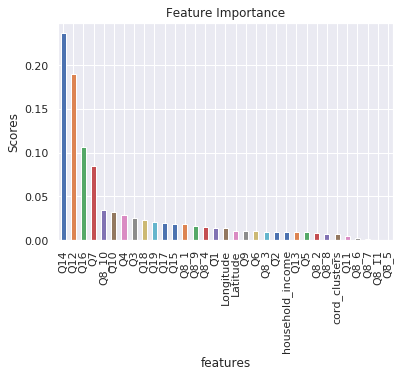

In [77]:
alg_2 = XGBClassifier(objective="MultiClass")
print("XGBOOST")
model_2 = model_train(x_tr,x_tes,y_tr,y_tes,alg_2)

# CATBOOST

In [78]:
cat_features = ['Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q14', 'Q16', 'Q17', 'Q18', 'Q19']

Catboost
0:	learn: -1.3541142	total: 224ms	remaining: 3m 55s
1:	learn: -1.3249261	total: 410ms	remaining: 3m 34s
2:	learn: -1.2974596	total: 610ms	remaining: 3m 32s
3:	learn: -1.2723862	total: 773ms	remaining: 3m 22s
4:	learn: -1.2486029	total: 885ms	remaining: 3m 5s
5:	learn: -1.2272992	total: 1.05s	remaining: 3m 3s
6:	learn: -1.2076778	total: 1.26s	remaining: 3m 7s
7:	learn: -1.1884729	total: 1.47s	remaining: 3m 11s
8:	learn: -1.1702345	total: 1.65s	remaining: 3m 10s
9:	learn: -1.1532315	total: 1.75s	remaining: 3m 2s
10:	learn: -1.1365077	total: 1.88s	remaining: 2m 57s
11:	learn: -1.1213891	total: 2s	remaining: 2m 53s
12:	learn: -1.1071503	total: 2.18s	remaining: 2m 54s
13:	learn: -1.0937816	total: 2.29s	remaining: 2m 49s
14:	learn: -1.0810074	total: 2.38s	remaining: 2m 44s
15:	learn: -1.0689496	total: 2.59s	remaining: 2m 47s
16:	learn: -1.0568463	total: 2.75s	remaining: 2m 47s
17:	learn: -1.0460766	total: 2.95s	remaining: 2m 49s
18:	learn: -1.0356744	total: 3.13s	remaining: 2m 50s
1

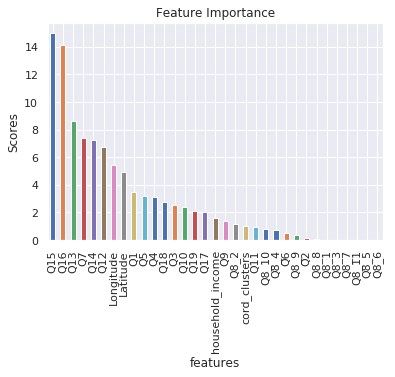

In [79]:
alg_3 = CatBoostClassifier(loss_function="MultiClass",cat_features=cat_features,early_stopping_rounds=2,iterations=1050)
print("Catboost")
model_3 = model_train(x_tr,x_tes,y_tr,y_tes,alg_3)

# Preparing test set for predictions

In [ ]:
test.head()

In [ ]:
id = test.ID

In [ ]:
test.drop(['ID','region'],inplace=True,axis=1)

In [ ]:
predictions = model_3.predict_proba(test)

In [ ]:
submission = sample_sub

In [ ]:
submission['ID'] = id
submission.head()

In [ ]:
submission[['no_financial_services', 'other_only', 'mm_only', 'mm_plus']] = predictions

In [ ]:
submission.to_csv("catboost_sub.csv",index=False)

In [ ]:
# Averaging submissions

In [ ]:
cat_boost = pd.read_csv("catboost_sub.csv")
xgb = pd.read_csv("xgboost_sub.csv")

In [ ]:
av = (xgb+cat_boost)/2

In [ ]:
av.head()

In [ ]:
av.to_csv("cat_xgb_average.csv",index=False)